In [4]:
import glob
import os
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
from werkzeug.utils import secure_filename
import cv2
import numpy as np
import cvlib as cv

def load_and_resize_image(face_img):
    p = Image.fromarray(face_img)
    r = p.resize((128, 128))
    return np.array(r)

def normalize_image(image_array):
    n = image_array / 255.0
    return (n ** 1.5) * 255.0

def clip_image_values(image_array):
    return np.clip(image_array, 0, 255).astype(np.uint8)

def convert_to_gray(image_array):
    return cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

def denoise_image(gray_image):
    return cv2.GaussianBlur(gray_image, (5, 5), 0)

def process_image(face_img):
    r = load_and_resize_image(face_img)
    n = normalize_image(r)
    c = clip_image_values(n)
    g = convert_to_gray(c)
    d = denoise_image(g)
    return d

for img in glob.glob(r"D:\projects\Main projects gec\face recognition\face recognition data/*"):
    for i in glob.glob(r"" + str(img) + "/*"):
        f = cv2.imread(i)
        faces, confidences = cv.detect_face(f)
        os.makedirs(r"D:\projects\Main projects gec\face recognition\Newdata2"+str(img[68:]), exist_ok=True)
        basepath = os.path.dirname(r"D:\projects\Main projects gec\face recognition\Newdata2"+str(img[68:]))
        for idx, face in enumerate(faces):
            (startX, startY, endX, endY) = face
            face_img = f[startY:endY, startX:endX]
            file_path = os.path.join(
                basepath, str(img[69:]), secure_filename(i))
            if face_img is not None and face_img.size > 0:
                processed_image = process_image(face_img)
                cv2.imwrite(file_path, cv2.cvtColor(processed_image, cv2.COLOR_GRAY2RGB))
            else:
                print(f"Skipping writing for {file_path} due to empty or None face_img.")


Skipping writing for D:\projects\Main projects gec\face recognition\Newdata2\Ram Charan\D_projects_Main_projects_gec_face_recognition_face_recognition_data_Ram_Charan_10.jpg due to empty or None face_img.
Skipping writing for D:\projects\Main projects gec\face recognition\Newdata2\Ram Charan\D_projects_Main_projects_gec_face_recognition_face_recognition_data_Ram_Charan_10.jpg due to empty or None face_img.
Skipping writing for D:\projects\Main projects gec\face recognition\Newdata2\Ram Charan\D_projects_Main_projects_gec_face_recognition_face_recognition_data_Ram_Charan_10.jpg due to empty or None face_img.
Skipping writing for D:\projects\Main projects gec\face recognition\Newdata2\Ram Charan\D_projects_Main_projects_gec_face_recognition_face_recognition_data_Ram_Charan_10.jpg due to empty or None face_img.
Skipping writing for D:\projects\Main projects gec\face recognition\Newdata2\Ram Charan\D_projects_Main_projects_gec_face_recognition_face_recognition_data_Ram_Charan_8.jpg due to 

In [25]:
import cv2
import numpy as np
import os
import random

def rotate_image(image, angle):
    r, c, _ = image.shape
    re = cv2.getRotationMatrix2D((c / 2, r / 2), angle, 1)
    ro = cv2.warpAffine(image, re, (c, r))
    return ro

def flip_image_horizontal(image):
    f = cv2.flip(image, 1)
    return f

def adjust_brightness(image, factor):
    h = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h[:,:,2] = np.clip(h[:,:,2] * factor, 0, 255)
    b = cv2.cvtColor(h, cv2.COLOR_HSV2BGR)
    return b

def random_crop(image, crop_size):
    r, c, _ = image.shape
    x = np.random.randint(0, c - crop_size[1] + 1)
    y = np.random.randint(0, r - crop_size[0] + 1)
    c = image[y:y+crop_size[0], x:x+crop_size[1]]
    return cr

def random_scale(image, scale_range):
    s = np.random.uniform(scale_range[0], scale_range[1])
    sc = cv2.resize(image, None, fx=s, fy=s)
    return sc

def add_noise(image, noise_level):
    n = np.random.normal(0, noise_level, image.shape)
    no = np.clip(image + noise, 0, 255)
    return no

def augment_and_save_images(input_folder, output_folder, max_output_images=50):
    os.makedirs(output_folder, exist_ok=True)
    fe = os.listdir(input_folder)
    random.shuffle(fe)
    g = 0
    for f in fe:
        if g >= max_output_images:
            break
        im = os.path.join(input_folder, f)
        image = cv2.imread(im)
        for i in range(2):
            au = random.choice(['rotate', 'flip', 'brightness'])
            if au == 'rotate':
                rotated_img = rotate_image(image, np.random.uniform(-30, 30))
                augmented_img = rotated_img
            elif au == 'flip':
                if np.random.rand() > 0.5:
                    flipped_img = flip_image_horizontal(image)
                    augmented_img = flipped_img
                else:
                    augmented_img = image
            elif au == 'brightness':
                brightness_factor = np.random.uniform(0.5, 1.5)
                brightened_img = adjust_brightness(image, brightness_factor)
                augmented_img = brightened_img
            output_filename = f"aug_{g}_{au}_{f}"
            output_path = os.path.join(output_folder, output_filename)
            cv2.imwrite(output_path, augmented_img)
            g += 1



In [28]:
import glob
for img in glob.glob(r"D:\projects\Main projects gec\face recognition\Newdata2/*"):
    input_folder = img
    output_folder =img 
    augment_and_save_images(input_folder, output_folder, max_output_images=50)


In [1]:
IMAGE_SIZE=[224,224]
from keras.applications.vgg16 import VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

from keras.layers import Input, Lambda, Dense, Flatten
x = Flatten()(vgg.output)

from keras.models import Model
prediction = Dense(12, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

model.compile(
  optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)


IMAGE_SIZE=[224,224]
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"D:\projects\Main projects gec\face recognition\Newdata2",
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(r"D:\projects\Main projects gec\face recognition\Newdata2",
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        class_mode = 'categorical')
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set)//3,
  validation_steps=len(test_set)//3
)


Found 3444 images belonging to 12 classes.
Found 3444 images belonging to 12 classes.


C:\Users\amang\AppData\Local\Temp\ipykernel_6580\2987462340.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
36/36 [==============================] - 327s 9s/step - loss: 2.1478 - accuracy: 0.3776 - val_loss: 1.0432 - val_accuracy: 0.6840
Epoch 2/50
36/36 [==============================] - 388s 11s/step - loss: 0.8660 - accuracy: 0.7656 - val_loss: 0.5379 - val_accuracy: 0.8906
Epoch 3/50
36/36 [==============================] - 391s 11s/step - loss: 0.5839 - accuracy: 0.8614 - val_loss: 0.4511 - val_accuracy: 0.8880
Epoch 4/50
36/36 [==============================] - 392s 11s/step - loss: 0.4366 - accuracy: 0.8889 - val_loss: 0.3188 - val_accuracy: 0.9262
Epoch 5/50
36/36 [==============================] - 390s 11s/step - loss: 0.3400 - accuracy: 0.9211 - val_loss: 0.2729 - val_accuracy: 0.9358
Epoch 6/50
36/36 [==============================] - 392s 11s/step - loss: 0.2724 - accuracy: 0.9392 - val_loss: 0.2023 - val_accuracy: 0.9540
Epoch 7/50
36/36 [==============================] - 596s 17s/step - loss: 0.2273 - accuracy: 0.9505 - val_loss: 0.1445 - val_accuracy: 0.9705
Epoch 8

In [2]:
model.save("deep.h5")

C:\Users\amang\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
training_set.class_indices

{'Aman': 0, 'PSPk': 1, 'Ram Charan': 2, 'Samantha': 3}

In [5]:
IMAGE_SIZE=[224,224]
from keras.applications.vgg19 import VGG19
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

from keras.layers import Input, Lambda, Dense, Flatten
x = Flatten()(vgg.output)

from keras.models import Model
prediction = Dense(12, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

model.compile(
  optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)


IMAGE_SIZE=[224,224]
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"D:\projects\Main projects gec\face recognition\Newdata2",
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(r"D:\projects\Main projects gec\face recognition\Newdata2",
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        class_mode = 'categorical')
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set)//3,
  validation_steps=len(test_set)//3
)


Found 3444 images belonging to 12 classes.
Found 3444 images belonging to 12 classes.


C:\Users\amang\AppData\Local\Temp\ipykernel_6580\1675906152.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
36/36 [==============================] - 448s 13s/step - loss: 2.9513 - accuracy: 0.2422 - val_loss: 1.4451 - val_accuracy: 0.5347
Epoch 2/50
36/36 [==============================] - 502s 14s/step - loss: 1.3135 - accuracy: 0.6085 - val_loss: 1.1337 - val_accuracy: 0.6050
Epoch 3/50
36/36 [==============================] - 504s 14s/step - loss: 0.9517 - accuracy: 0.7092 - val_loss: 0.7880 - val_accuracy: 0.7526
Epoch 4/50
36/36 [==============================] - 504s 14s/step - loss: 0.7307 - accuracy: 0.7899 - val_loss: 0.7317 - val_accuracy: 0.7743
Epoch 5/50
36/36 [==============================] - 499s 14s/step - loss: 0.5979 - accuracy: 0.8377 - val_loss: 0.6772 - val_accuracy: 0.8316
Epoch 6/50
36/36 [==============================] - 500s 14s/step - loss: 0.5244 - accuracy: 0.8602 - val_loss: 0.4938 - val_accuracy: 0.8646
Epoch 7/50
36/36 [==============================] - 505s 14s/step - loss: 0.4666 - accuracy: 0.8785 - val_loss: 0.4187 - val_accuracy: 0.8785
Epoch 

In [6]:
model.save("deep19.h5")

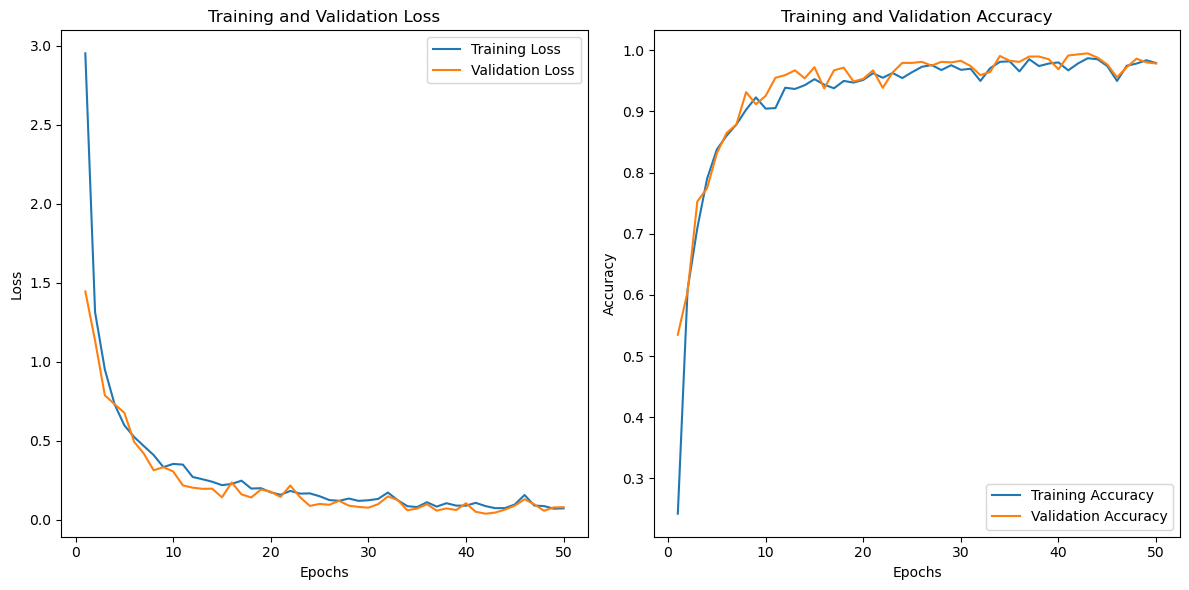

In [2]:
import re
import matplotlib.pyplot as plt

data = """
Epoch 1/50
36/36 [==============================] - 448s 13s/step - loss: 2.9513 - accuracy: 0.2422 - val_loss: 1.4451 - val_accuracy: 0.5347
Epoch 2/50
36/36 [==============================] - 502s 14s/step - loss: 1.3135 - accuracy: 0.6085 - val_loss: 1.1337 - val_accuracy: 0.6050
Epoch 3/50
36/36 [==============================] - 504s 14s/step - loss: 0.9517 - accuracy: 0.7092 - val_loss: 0.7880 - val_accuracy: 0.7526
Epoch 4/50
36/36 [==============================] - 504s 14s/step - loss: 0.7307 - accuracy: 0.7899 - val_loss: 0.7317 - val_accuracy: 0.7743
Epoch 5/50
36/36 [==============================] - 499s 14s/step - loss: 0.5979 - accuracy: 0.8377 - val_loss: 0.6772 - val_accuracy: 0.8316
Epoch 6/50
36/36 [==============================] - 500s 14s/step - loss: 0.5244 - accuracy: 0.8602 - val_loss: 0.4938 - val_accuracy: 0.8646
Epoch 7/50
36/36 [==============================] - 505s 14s/step - loss: 0.4666 - accuracy: 0.8785 - val_loss: 0.4187 - val_accuracy: 0.8785
Epoch 8/50
36/36 [==============================] - 489s 14s/step - loss: 0.4099 - accuracy: 0.9028 - val_loss: 0.3136 - val_accuracy: 0.9314
Epoch 9/50
36/36 [==============================] - 488s 14s/step - loss: 0.3336 - accuracy: 0.9228 - val_loss: 0.3333 - val_accuracy: 0.9115
Epoch 10/50
36/36 [==============================] - 489s 14s/step - loss: 0.3539 - accuracy: 0.9044 - val_loss: 0.3061 - val_accuracy: 0.9253
Epoch 11/50
36/36 [==============================] - 487s 14s/step - loss: 0.3495 - accuracy: 0.9053 - val_loss: 0.2180 - val_accuracy: 0.9549
Epoch 12/50
36/36 [==============================] - 487s 14s/step - loss: 0.2714 - accuracy: 0.9386 - val_loss: 0.2035 - val_accuracy: 0.9592
Epoch 13/50
36/36 [==============================] - 491s 14s/step - loss: 0.2569 - accuracy: 0.9366 - val_loss: 0.1964 - val_accuracy: 0.9670
Epoch 14/50
36/36 [==============================] - 491s 14s/step - loss: 0.2412 - accuracy: 0.9427 - val_loss: 0.1971 - val_accuracy: 0.9540
Epoch 15/50
36/36 [==============================] - 487s 14s/step - loss: 0.2195 - accuracy: 0.9526 - val_loss: 0.1426 - val_accuracy: 0.9722
Epoch 16/50
36/36 [==============================] - 490s 14s/step - loss: 0.2271 - accuracy: 0.9436 - val_loss: 0.2366 - val_accuracy: 0.9375
Epoch 17/50
36/36 [==============================] - 485s 14s/step - loss: 0.2479 - accuracy: 0.9377 - val_loss: 0.1612 - val_accuracy: 0.9670
Epoch 18/50
36/36 [==============================] - 489s 14s/step - loss: 0.1980 - accuracy: 0.9497 - val_loss: 0.1415 - val_accuracy: 0.9714
Epoch 19/50
36/36 [==============================] - 489s 14s/step - loss: 0.2002 - accuracy: 0.9470 - val_loss: 0.1921 - val_accuracy: 0.9488
Epoch 20/50
36/36 [==============================] - 491s 14s/step - loss: 0.1743 - accuracy: 0.9514 - val_loss: 0.1775 - val_accuracy: 0.9531
Epoch 21/50
36/36 [==============================] - 522s 15s/step - loss: 0.1585 - accuracy: 0.9623 - val_loss: 0.1454 - val_accuracy: 0.9670
Epoch 22/50
36/36 [==============================] - 505s 14s/step - loss: 0.1832 - accuracy: 0.9549 - val_loss: 0.2173 - val_accuracy: 0.9384
Epoch 23/50
36/36 [==============================] - 500s 14s/step - loss: 0.1659 - accuracy: 0.9627 - val_loss: 0.1435 - val_accuracy: 0.9635
Epoch 24/50
36/36 [==============================] - 496s 14s/step - loss: 0.1675 - accuracy: 0.9544 - val_loss: 0.0883 - val_accuracy: 0.9792
Epoch 25/50
36/36 [==============================] - 500s 14s/step - loss: 0.1494 - accuracy: 0.9640 - val_loss: 0.1007 - val_accuracy: 0.9792
Epoch 26/50
36/36 [==============================] - 494s 14s/step - loss: 0.1252 - accuracy: 0.9728 - val_loss: 0.0954 - val_accuracy: 0.9809
Epoch 27/50
36/36 [==============================] - 501s 14s/step - loss: 0.1204 - accuracy: 0.9757 - val_loss: 0.1206 - val_accuracy: 0.9748
Epoch 28/50
36/36 [==============================] - 499s 14s/step - loss: 0.1348 - accuracy: 0.9675 - val_loss: 0.0898 - val_accuracy: 0.9809
Epoch 29/50
36/36 [==============================] - 495s 14s/step - loss: 0.1201 - accuracy: 0.9754 - val_loss: 0.0819 - val_accuracy: 0.9800
Epoch 30/50
36/36 [==============================] - 498s 14s/step - loss: 0.1239 - accuracy: 0.9679 - val_loss: 0.0769 - val_accuracy: 0.9826
Epoch 31/50
36/36 [==============================] - 508s 14s/step - loss: 0.1325 - accuracy: 0.9696 - val_loss: 0.0992 - val_accuracy: 0.9740
Epoch 32/50
36/36 [==============================] - 498s 14s/step - loss: 0.1729 - accuracy: 0.9497 - val_loss: 0.1482 - val_accuracy: 0.9592
Epoch 33/50
36/36 [==============================] - 495s 14s/step - loss: 0.1244 - accuracy: 0.9705 - val_loss: 0.1256 - val_accuracy: 0.9644
Epoch 34/50
36/36 [==============================] - 634s 18s/step - loss: 0.0865 - accuracy: 0.9809 - val_loss: 0.0603 - val_accuracy: 0.9905
Epoch 35/50
36/36 [==============================] - 756s 21s/step - loss: 0.0808 - accuracy: 0.9818 - val_loss: 0.0720 - val_accuracy: 0.9826
Epoch 36/50
36/36 [==============================] - 759s 21s/step - loss: 0.1115 - accuracy: 0.9653 - val_loss: 0.0992 - val_accuracy: 0.9809
Epoch 37/50
36/36 [==============================] - 771s 22s/step - loss: 0.0839 - accuracy: 0.9852 - val_loss: 0.0582 - val_accuracy: 0.9896
Epoch 38/50
36/36 [==============================] - 781s 22s/step - loss: 0.1053 - accuracy: 0.9740 - val_loss: 0.0723 - val_accuracy: 0.9896
Epoch 39/50
36/36 [==============================] - 784s 22s/step - loss: 0.0901 - accuracy: 0.9781 - val_loss: 0.0623 - val_accuracy: 0.9852
Epoch 40/50
36/36 [==============================] - 734s 21s/step - loss: 0.0898 - accuracy: 0.9800 - val_loss: 0.1047 - val_accuracy: 0.9688
Epoch 41/50
36/36 [==============================] - 476s 13s/step - loss: 0.1076 - accuracy: 0.9670 - val_loss: 0.0510 - val_accuracy: 0.9913
Epoch 42/50
36/36 [==============================] - 502s 14s/step - loss: 0.0870 - accuracy: 0.9783 - val_loss: 0.0389 - val_accuracy: 0.9931
Epoch 43/50
36/36 [==============================] - 496s 14s/step - loss: 0.0739 - accuracy: 0.9868 - val_loss: 0.0462 - val_accuracy: 0.9948
Epoch 44/50
36/36 [==============================] - 506s 14s/step - loss: 0.0744 - accuracy: 0.9852 - val_loss: 0.0650 - val_accuracy: 0.9878
Epoch 45/50
36/36 [==============================] - 502s 14s/step - loss: 0.0973 - accuracy: 0.9740 - val_loss: 0.0900 - val_accuracy: 0.9766
Epoch 46/50
36/36 [==============================] - 497s 14s/step - loss: 0.1575 - accuracy: 0.9497 - val_loss: 0.1304 - val_accuracy: 0.9557
Epoch 47/50
36/36 [==============================] - 658s 19s/step - loss: 0.0903 - accuracy: 0.9746 - val_loss: 0.0985 - val_accuracy: 0.9722
Epoch 48/50
36/36 [==============================] - 747s 21s/step - loss: 0.0871 - accuracy: 0.9781 - val_loss: 0.0574 - val_accuracy: 0.9861
Epoch 49/50
36/36 [==============================] - 782s 22s/step - loss: 0.0705 - accuracy: 0.9835 - val_loss: 0.0788 - val_accuracy: 0.9800
Epoch 50/50
36/36 [==============================] - 620s 17s/step - loss: 0.0726 - accuracy: 0.9789 - val_loss: 0.0799 - val_accuracy: 0.9783
"""
loss_pattern = re.compile(r'loss: ([\d.]+) - accuracy: ([\d.]+)')
val_loss_pattern = re.compile(r'val_loss: ([\d.]+) - val_accuracy: ([\d.]+)')

losses = []
accuracies = []
val_losses = []
val_accuracies = []

matches = re.findall(loss_pattern, data)
for loss, accuracy in matches:
    losses.append(float(loss))
    accuracies.append(float(accuracy))

matches = re.findall(val_loss_pattern, data)
for val_loss, val_accuracy in matches:
    val_losses.append(float(val_loss))
    val_accuracies.append(float(val_accuracy))

epochs = range(1, len(losses) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
